In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
from collections import Counter
pd.set_option('display.max_columns', 50)
from googletrans import Translator
from tqdm import tqdm
import datetime

In [2]:
orders = pd.read_csv('../Data/Processed/orders.csv', encoding='utf-8')

In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,seller_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,O cliente não comentou,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,289cdb325fb7e7f891c38608bf9e0962,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,O cliente não comentou,O cliente não comentou,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,O cliente não comentou,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,66922902710d126a0e7d26b0e3805106,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,O cliente não comentou,O cliente não comentou,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,2c9e548be18521d1c43cde1c582c6de8,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [6]:
def validate(date_text):
    try:
        if date_text != datetime.datetime.strptime(date_text, '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d %H:%M:%S'):
            raise ValueError
        return True
    except ValueError:
        return False
    
clean_orders = orders[orders['order_purchase_timestamp'].apply(validate) == True]
clean_orders = clean_orders[clean_orders['order_approved_at'].apply(validate) == True]
clean_orders = clean_orders[clean_orders['order_delivered_carrier_date'].apply(validate) == True]
clean_orders = clean_orders[clean_orders['order_estimated_delivery_date'].apply(validate) == True]

In [7]:
clean_orders = clean_orders.astype({"order_status" : 'category', \
                       "order_purchase_timestamp" : 'datetime64[ns]', 
                        "order_approved_at" : 'datetime64[ns]', \
                       "order_delivered_carrier_date" : 'datetime64[ns]', 
                        "order_delivered_customer_date" : 'datetime64[ns]', \
                       "order_estimated_delivery_date" : 'datetime64[ns]', 
                        'review_creation_date':'datetime64[ns]', \
                        "review_answer_timestamp" : 'datetime64[ns]', "shipping_limit_date" : 'datetime64[ns]', \
                        "product_category_name" : 'category', 
                       })

In [9]:
clean_orders.nunique()

order_id                         95978
customer_id                      95978
order_status                         2
order_purchase_timestamp         95621
order_approved_at                87873
order_delivered_carrier_date     79723
order_delivered_customer_date    95178
order_estimated_delivery_date      444
payment_sequential                  15
payment_type                         4
payment_installments                24
payment_value                    27549
customer_unique_id               93311
customer_zip_code_prefix         14889
customer_city                     4085
customer_state                      27
review_id                        95978
review_score                         5
review_comment_title              4420
review_comment_message           34983
review_creation_date               627
review_answer_timestamp          95823
order_item_id                       17
seller_id                         2958
product_id                       31037
shipping_limit_date      

# RFM analysis of sellers 

https://towardsdatascience.com/apply-rfm-principles-to-cluster-customers-with-k-means-fef9bcc9ab16

In [15]:
print('Most recent invoice is from:')
print(clean_orders['order_approved_at'].max())

print('Least recent invoice is from :')
print(clean_orders['order_approved_at'].min())


lastDate = clean_orders['order_approved_at'].max()
clean_orders['InvoiceDate'] = clean_orders['order_approved_at']

Most recent invoice is from:
2018-08-29 15:10:26
Least recent invoice is from :
2016-10-04 09:43:32


In [91]:
clean_orders['Total_price'] = clean_orders['price'] + clean_orders['freight_value']

In [92]:
rfmTable = clean_orders.groupby('seller_id').agg({'InvoiceDate': lambda x: (lastDate - x.max()).days, 
                                                  'Total_price': lambda x: x.sum()})

rfmTable['InvoiceNo'] = clean_orders.groupby('seller_id').apply(lambda x : len(x))
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'Total_price': 'monetary'}, inplace=True)

rfmTable.head()

,recency,monetary,frequency
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,314,2748.06,3
001cca7ae9ae17fb1caed9dfb1094831,47,32968.37,194
002100f778ceb8431b7a1020ff7ab48f,139,2093.36,49
003554e2dce176b5555353e4f3555ac8,257,139.38,1
004c9cd9d87a3c30c522c48c4fc07416,116,22068.48,147


Now, we have to calculate the scores. 

We order the data by frequency in descending mode. Then, we divide the number of customers on the data set by 5. We assign a number from 5 to 1 to each one of the previously created segments. Same for monetary and recency columns too.

For the recency column, since the most recent orders are better, we will order it as ascending.

In [94]:
# Create f_score

f_score = []
m_score = []
r_score = []

columns = ['frequency', 'monetary']
scores_str = ['f_quartile', 'm_quartile']
scores = [f_score, m_score]
N = rfmTable.shape[0] #number of sellers

for n in range(len(columns)):
    # Order by column
    rfmTable = rfmTable.sort_values(columns[n], ascending=False)
    
    # Create new index
    refs = np.arange(N)
    rfmTable['refs'] = list(refs)
    
    segment = int(N / 5)
    # Add score
    for i, row in rfmTable.iterrows():
        if row['refs'] <= segment:
            scores[n].append(5)
        elif row['refs'] > segment and row['refs'] <= segment*2:
            scores[n].append(4)
        elif row['refs'] > segment*2 and row['refs'] <= segment*3:
            scores[n].append(3)
        elif row['refs'] > segment*3 and row['refs'] <= segment*4:
            scores[n].append(2)
        else: 
            scores[n].append(1)

    # Create f_score column
    rfmTable[scores_str[n]] = scores[n]
    
# For recency, we do the opposite: most recents are better, so we order as ascending
rfmTable = rfmTable.sort_values('recency', ascending=True)
    
# Recreate index
refs = np.arange(N)
rfmTable['refs'] = refs
    
# Add score
for i, row in rfmTable.iterrows():
    if row['refs'] <= segment:
        r_score.append(5)
    elif row['refs'] > segment and row['refs'] <= segment*2:
        r_score.append(4)
    elif row['refs'] > segment*2 and row['refs'] <= segment*3:
        r_score.append(3)
    elif row['refs'] > segment*3 and row['refs'] <= segment*4:
        r_score.append(2)
    else: 
        r_score.append(1)

# Create r_score column
rfmTable['r_quartile'] = r_score

In [95]:
rfmTable.head()

,recency,monetary,frequency,refs,f_quartile,m_quartile,r_quartile
seller_id,,,,,,,
c70c1b0d8ca86052f45a432a38b73958,0,39779.25,256,0,5,5,5
c731d18cea9bf687ffee82a241c25b11,0,4633.39,23,1,4,4,5
4e922959ae960d389249c378d1c939f5,0,52585.10,412,2,5,5,5
7dc8c42cc750eeafea6c85712ffee9bf,0,7594.72,41,3,5,5,5
54583ab379489add547fe47b628db589,0,2391.08,10,4,4,4,5


In [97]:
rfmTable['RFMScore'] = rfmTable.r_quartile.map(str) \
                            + rfmTable.f_quartile.map(str) \
                            + rfmTable.m_quartile.map(str)

**Top 10 Sellers**

In [99]:
rfmTable[rfmTable['RFMScore'] == '555'].sort_values('monetary', ascending=False).head(10)

,recency,monetary,frequency,refs,f_quartile,m_quartile,r_quartile,RFMScore
seller_id,,,,,,,,
4869f7a5dfa277a7dca6462dcf3b52b2,4,247634.47,1115,192,5,5,5,555
4a3ca9315b744ce9f8e9374361493884,2,232423.08,1717,115,5,5,5,555
53243585a1d6dc2643021fd1853d8905,7,230797.02,348,431,5,5,5,555
fa1c13f2614d7b5c4749cbc52fecda94,0,200044.11,571,26,5,5,5,555
da8622b14eb17ae2831f4ac5b9dab84a,0,182482.13,1278,25,5,5,5,555
1025f0e2d44d7041d6cf58b6550e0bfa,3,171541.24,892,154,5,5,5,555
7a67c85e85bb2ce8582c35f2203ad736,7,160720.88,1131,426,5,5,5,555
955fee9216a65b617aa5c0531780ce60,0,156609.41,1254,20,5,5,5,555
6560211a19b47992c3666cc44a7e94c0,0,148994.13,1804,19,5,5,5,555


**Bottom 10 sellers**

In [101]:
rfmTable[rfmTable['RFMScore'] == '111'].sort_values('monetary', ascending=True).head(10)

,recency,monetary,frequency,refs,f_quartile,m_quartile,r_quartile,RFMScore
seller_id,,,,,,,,
77128dec4bec4878c37ab7d6169d6f26,531,15.22,1,2848,1,1,1,111
702835e4b785b67a084280efca355756,561,18.56,1,2890,1,1,1,111
ad14615bdd492b01b0d97922e87cb87f,564,19.21,1,2896,1,1,1,111
7ab0dd5487bab2dc835337b244f689fb,510,23.46,1,2824,1,1,1,111
c18309219e789960add0b2255ca4b091,267,24.00,1,2383,1,1,1,111
5b92bfa4120daa27c574daa2e386c693,555,24.96,1,2881,1,1,1,111
20d53aad4fe5ee93a64f8839609d3586,276,26.98,1,2416,1,1,1,111
9e25199f6ef7e7c347120ff175652c3b,520,27.02,1,2834,1,1,1,111
0f94588695d71662beec8d883ffacf09,546,27.59,1,2870,1,1,1,111


Best Recency score = 5: most recent sell. Best Frequency score = 5: most quantity sold. Best Monetary score = 5: Brings the most money

## Some Numbers 

In [127]:
print("Best Sellers: ",len(rfmTable[rfmTable['RFMScore'] == '555']))
print('Active Sellers:', len(rfmTable[rfmTable['f_quartile'] == 5]))
print("Big MoneyMaker: ",len(rfmTable[rfmTable['m_quartile']==5]))
print('inactive Sellers: ',len(rfmTable[rfmTable['r_quartile']==1]))
print('Inactive and Cheap Sellers: ',len(rfmTable[rfmTable['RFMScore']=='111']))

Best Sellers:  230
Active Sellers: 592
Big MoneyMaker:  592
inactive Sellers:  593
Inactive and Cheap Sellers:  159


# Link between RFM analysis and Customer Sentiment Analysis

## best sellers

In [113]:
best_sellers = list(rfmTable[rfmTable['RFMScore'] == '555'].reset_index().seller_id)

In [115]:
top_sellers = clean_orders[clean_orders['seller_id'].apply(lambda x : x in best_sellers)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182C41AD4A8>]],
      dtype=object)

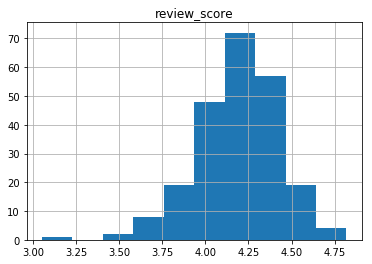

In [120]:
top_sellers.groupby('seller_id').agg({'review_score' : 'mean'}).hist()

In [148]:
top_sellers.groupby('seller_id').agg({'review_score' : 'mean'}).describe(), top_sellers.shape

(       review_score
 count    230.000000
 mean       4.187384
 std        0.246781
 min        3.052632
 25%        4.044706
 50%        4.192928
 75%        4.360987
 max        4.818182, (50310, 38))

## Worst Sellers

In [121]:
worst_sellers = list(rfmTable[rfmTable['RFMScore'] == '111'].reset_index().seller_id)

In [122]:
bottom_sellers = clean_orders[clean_orders['seller_id'].apply(lambda x : x in worst_sellers)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182C4212DD8>]],
      dtype=object)

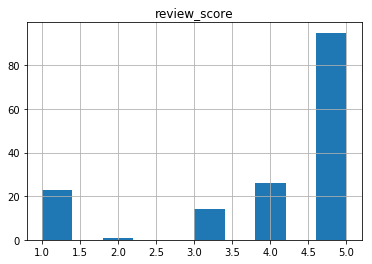

In [123]:
bottom_sellers.groupby('seller_id').agg({'review_score' : 'mean'}).hist()

In [149]:
bottom_sellers.groupby('seller_id').agg({'review_score' : 'mean'}).describe(), bottom_sellers.shape

(       review_score
 count    159.000000
 mean       4.062893
 std        1.421737
 min        1.000000
 25%        4.000000
 50%        5.000000
 75%        5.000000
 max        5.000000, (159, 39))

In [130]:
bottom_sellers[bottom_sellers['review_score'] == 1].review_comment_message

6695                                O cliente não comentou
9492                                O cliente não comentou
18158                               O cliente não comentou
21744                               O cliente não comentou
25405                               O cliente não comentou
32389                                Não recebi mercadoria
38708                               O cliente não comentou
39685    Comprei um sling preto e veio um azul. Esperei...
52252    O produto ainda NÃO chegou!\r\r\nQuem irá se r...
52957                                    Nao veio o espeto
54321    Comprei dia 6/10 chegou 26/11 e trincado e com...
54543                               O cliente não comentou
58816    Simplesmente decepcionada, até o momento não r...
59190    Comprei dois produtos e recebi somente um. Man...
59315                               O cliente não comentou
66777            nao recebi meu pedido, e agora o que faço
68608                               O cliente não coment

In [146]:
bottom_sellers['delay'] = (bottom_sellers['order_estimated_delivery_date'] - bottom_sellers['order_delivered_customer_date']).dt.days

C:\Anaconda\envs\ada\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


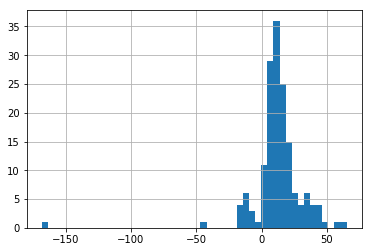

In [147]:
bottom_sellers.delay.hist(bins=50)